## Descripción
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con el cliente basada en datos analíticos.
Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un cliente se haya ido: puede que se vaya de puntillas.
Los indicadores de pérdida varían de un campo a otro. Si un usuario compra en una tienda en línea con poca frecuencia pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor se haya aburrido y te haya abandonado.
En el caso de un gimnasio, tiene sentido decir que un cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.


## Objetivo

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

## Tabla de contenido 
1. Descargar los datos
2. Llevar a cabo el análisis exploratorio de datos (EDA)
3. Construir un modelo para predecir la cancelación de usuarios
4. Crear clústeres de usuarios
5. Conclusión final 

## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.cluster.hierarchy import dendrogram, linkage 

## Descripción de las columnas

* `Churn` - la cancelación para el mes en cuestión
Campos de dataset actuales:
Datos de usuario del mes anterior
* `gender` - Genero
* `Near_Location` — si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio
* `Partner` — si el usuario es un trabajador de una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes)
* `Promo_friends` — si el usuario originalmente se inscribió mediante una oferta "trae a un amigo" (se utilizó el código promocional de un amigo cuando pagaron el primer abono)
* `Phone` — si el usuario aportó el número de teléfono
* `Age` - Edad 
* `Lifetime` — el tiempo (en meses) desde que el usuario llegó por primera vez al gimnasio
Datos del registro de visitas y compras y datos sobre el estado actual de la membresía
* `Contract_period` — 1 mes, 3 meses, 6 meses o 1 año
* `Month_to_end_contract` — los meses que faltan hasta que expire el contrato
* `Group_visits` — si el usuario participa en sesiones grupales
* `Avg_class_frequency_total` — frecuencia media de visitas por semana a lo largo de la vida del cliente
* `Avg_class_frequency_current_month` — frecuencia media de visitas por semana en el mes anterior
* `Avg_additional_charges_total` — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

## Paso 1. Descargar los datos

---

In [ ]:
try:
    gym = pd.read_csv('/content/gym_churn_us.csv')
except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [ ]:
gym.columns = gym.columns.str.lower()
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
gym.shape

(4000, 14)

In [ ]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

## 2 Llevar a cabo el análisis exploratorio de datos (EDA)

---

**Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).**

In [ ]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [ ]:
gym.groupby(['contract_period'])['contract_period'].count()/4000

contract_period
1     0.55175
6     0.20825
12    0.24000
Name: contract_period, dtype: float64

In [ ]:
gym.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

## Conclusión

* Tenemos 4000 registros de datos de clientes
* Misma cantidad de clientes hombres y de mujeres con una edad media de 29 años
* Casi la mitad de nuestros clientes tienen un programa de descuento debido a que son empleados de una empresa asociada
* El 30% de los clientes se inscribieron originalmente a través de una oferta de "trae a un amigo".
* El 90% de los clientes proporcionaron sus números de teléfono.
* El 55% de los clientes firmaron por 1 mes, el 20% por 6 meses y el 24% por 12 meses de contrato.
* El 41% de los clientes participa en sesiones grupales
* El monto promedio de dinero gastado en otros servicios de gimnasio: cafetería, artículos deportivos, cosméticos, masajes, etc. es de 146 dólares.
* La frecuencia media de visitas por semana respecto al mes anterior es de 1,76
* La frecuencia media de visitas por semana a lo largo de la vida del cliente es de 1,86
* Los datos no tienen valores nulos o faltantes

**Observa los valores medios de las características en dos grupos: para los que se fueron (cancelación) y para los que se quedaron (utiliza el método groupby()).**

In [ ]:
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [ ]:
(gym.groupby('churn')['churn'].count()/4000)*100

churn
0    73.475
1    26.525
Name: churn, dtype: float64

En líneas generales el 73% de los clientes se mantuvo activo y un 26% abandono el gimnasio.

In [ ]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [ ]:
cancelacion = gym.query('churn == 1')
(cancelacion.groupby(['lifetime'])['lifetime'].sum()/1061)*100

lifetime
0     0.000000
1    39.019793
2    29.594722
3    14.137606
4     8.671065
5     3.770028
6     2.262017
8     0.754006
9     0.848256
Name: lifetime, dtype: float64

El 68 % de los clientes que abandonaron se fueron en los dos primeros meses.



**Traza histogramas de barras y distribuciones de características para aquellos que se fueron (cancelación) y para los que se quedaron.**

In [ ]:
cancelacion = gym.query('churn == 1')
continuan = gym.query('churn == 0')

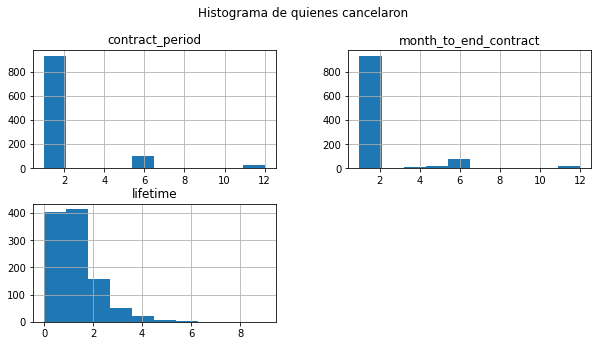

In [ ]:
cancelacion[['contract_period', 'month_to_end_contract','lifetime']].hist(figsize=(10, 5))
plt.suptitle('Histograma de quienes cancelaron', y= 1);

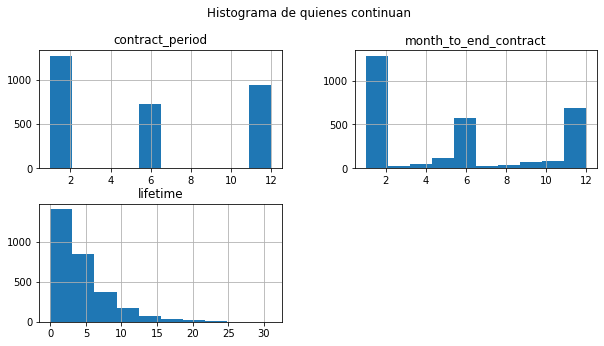

In [ ]:
continuan[['contract_period', 'month_to_end_contract','lifetime']].hist(figsize=(10, 5))
plt.suptitle('Histograma de quienes continuan', y= 1);

**Crea una matriz de correlación y muéstrala.**

In [ ]:
matriz = gym[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']]
matriz.head()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,6,29,14.227470,5.0,3,0.020398,0.000000
1,12,31,113.202938,12.0,7,1.922936,1.910244
2,1,28,129.448479,1.0,2,1.859098,1.736502
3,12,33,62.669863,12.0,2,3.205633,3.357215
4,1,26,198.362265,1.0,3,1.113884,1.120078


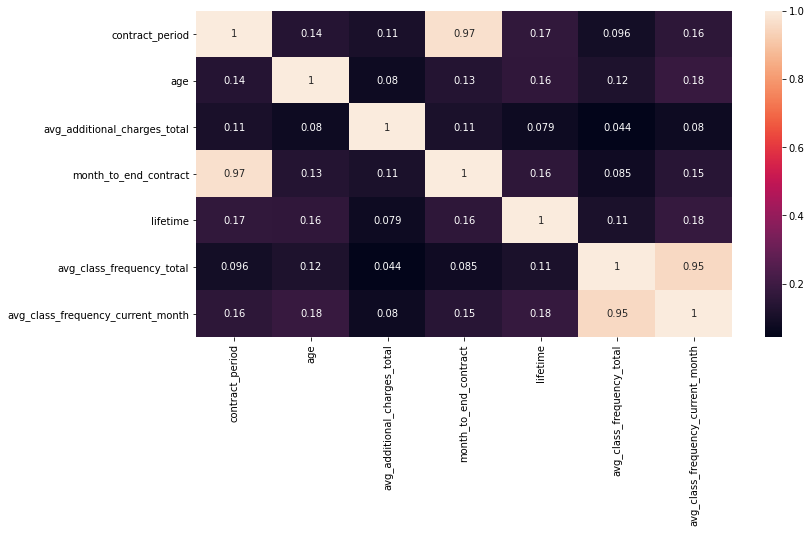

In [ ]:
cm = matriz.corr()

plt.figure(figsize = (12,6))
sns.heatmap(cm, annot = True)
plt.show()

A partir de la matriz de correlación mostrada, podemos ver alguna correlación de los usuarios que abandonan, excepto el género y el teléfono.

In [ ]:
variables_cuan = gym[['contract_period','age','avg_additional_charges_total',
                  'month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']]

In [ ]:
variables_cual = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

In [ ]:
   for var in variables_cual:                          
        tabla = pd.crosstab(gym[var], gym['churn'])    
        _, p, _, _ = chi2_contingency(tabla)           
        if p < 0.05:
            print(f"{var} y churn tienen relación")    
        else:
            print(f"{var} y churn son independientes")

gender y churn son independientes
near_location y churn tienen relación
partner y churn tienen relación
promo_friends y churn tienen relación
phone y churn son independientes
group_visits y churn tienen relación
churn y churn tienen relación


### Pruebas pointbiseral (cuantitativa vs cualitativa)

---



In [ ]:
print(stats.pointbiserialr(gym['churn'],gym['contract_period']))
print(stats.pointbiserialr(gym['churn'],gym['age']))
print(stats.pointbiserialr(gym['churn'],gym['avg_additional_charges_total']))
print(stats.pointbiserialr(gym['churn'],gym['month_to_end_contract']))
print(stats.pointbiserialr(gym['churn'], gym['lifetime']))
print(stats.pointbiserialr(gym['churn'],gym['avg_class_frequency_total']))
print(stats.pointbiserialr(gym['churn'],gym['avg_class_frequency_current_month']))

PointbiserialrResult(correlation=-0.38998421158607816, pvalue=1.9181207976597264e-145)
PointbiserialrResult(correlation=-0.4047352528235899, pvalue=1.5144442927521406e-157)
PointbiserialrResult(correlation=-0.19869745106820344, pvalue=6.75931606807852e-37)
PointbiserialrResult(correlation=-0.38139298369571506, pvalue=1.1257083299085161e-138)
PointbiserialrResult(correlation=-0.4382199684479804, pvalue=2.1611104975555713e-187)
PointbiserialrResult(correlation=-0.24971511133289487, pvalue=6.372846955951773e-58)
PointbiserialrResult(correlation=-0.4123483907072646, pvalue=4.894130319291058e-164)


1. Según resultados, todos los valores de correlación son negativos, lo que indica que hay una correlación negativa entre la variable categórica binaria y la variable continua.
2. En todos estos resultados, los valores p son extremadamente bajos, lo que sugiere que es muy poco probable que la correlación observada sea el resultado del azar.

## Conclusión

Clientes que cancelaron:
* La mayoría no dura mas de 3 meses en el gimnasio.
* La mayoría le quedaban 2 meses de contrato.
* La mayoría realizo contratos por 3 meses.

Clientes que continuaron:
* los meses de duración de contrato se incremento en comparación a los que abandonaros.
* Mas de 500 usuarios les queda 12 meses de termino de contrato.
* Un aproximado de 200 personas alcanzaron los 10 meses en el gimnasio.



## Paso 3. Construir un modelo para predecir la cancelación de usuarios

---

**Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().**

In [ ]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [ ]:
# dividir los datos en características (la matriz X) y una variable objetivo (y)
X = gym.drop(columns = ['churn'])
y = gym['churn']

In [ ]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Entrena el modelo en el set de entrenamiento con dos métodos:**
* Regresión logística
* Bosque aleatorio

In [ ]:
# entrenar StandardScaler en el conjunto de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

# transformar conjuntos de entrenamiento y de prueba
#X_train_st = scaler.transform(X_train)
#X_test_st = scaler.transform(X_test)

StandardScaler()

In [ ]:
numeric = ['contract_period','age','avg_additional_charges_total',
                     'month_to_end_contract','lifetime','avg_class_frequency_total',
                     'avg_class_frequency_current_month']

In [ ]:
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

/tmp/ipykernel_28/2683684220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric] = scaler.fit_transform(X_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_28/2683684220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
# definir el algoritmo para el modelo de regresión logística
lr_model = LogisticRegression(random_state=0)
# entrenar el modelo 
lr_model.fit(X_train[numeric], y_train)
# utilizar el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test[numeric])
lr_probabilities = lr_model.predict_proba(X_test[numeric])[:,1]
# imprimir todas las métricas
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas para regresión logística:')

# definir el algoritmo para el nuevo modelo de random forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# entrenar el modelo de random forest
rf_model.fit(X_train[numeric], y_train)
# utilizar el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test[numeric])
rf_probabilities = rf_model.predict_proba(X_test[numeric])[:,1]
# imprimir todas las métricas
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Métricas para random forest:')

Métricas para regresión logística:
	Accuracy: 0.93
	Precision: 0.87
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97
Métricas para random forest:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


En general, ambos modelos parecen ser efectivos en la tarea de clasificación binaria, pero en términos de precisión y recall la regresión logística parece tener un mejor equilibrio entre las métricas de evaluación.

**Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?**

## Paso 4. Crear clústeres de usuarios

---

**Estandariza los datos.**

In [ ]:
# la estandarización de datos obligatoria antes de pasarlo al algoritmo
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5) # establecer el número de clústeres en 5
labels = km.fit_predict(X_sc) # aplicar el algoritmo a los datos y formar un vector de clúster

**Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.**

In [ ]:
# estandarización obligatoria de los datos antes de pasarlo al algoritmo
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

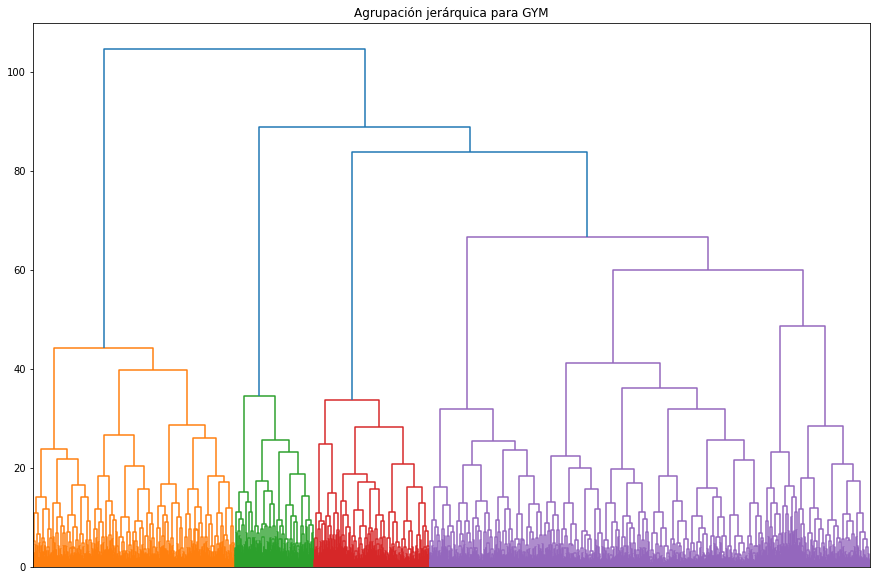

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.xticks([])
plt.show() 

**Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los de otros estudiantes. Sin embargo, en la vida real, nadie te dará tales pistas así que tendrás que decidir basándote en el gráfico del paso anterior.)**

In [ ]:
km = KMeans(n_clusters = 5,)

In [ ]:
labels = km.fit_predict(X_sc)

In [ ]:
gym['cluster'] = labels

**Mira los valores medios de característica para clústeres. ¿Hay algo que te llame la atención?**

In [ ]:
gym.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.488189,0.725197,0.297638,0.010236,1.0,1.946457,0.279528,28.156693,129.758179,1.853543,2.245669,1.257469,1.007915,0.556693
2,0.492777,0.948636,0.812199,0.998395,1.0,3.017657,0.436597,29.038523,141.395773,2.826645,3.691814,1.701307,1.591963,0.263242
3,0.500000,0.937355,0.738979,0.483759,1.0,11.867749,0.549884,29.893271,163.338255,10.819026,4.692575,2.005023,1.997614,0.022042
4,0.559953,0.847497,0.284051,0.074505,1.0,2.676368,0.445867,30.046566,161.153113,2.474971,4.867288,2.811553,2.804386,0.079162


**Traza distribuciones de características para los clústeres. ¿Notas algo?**

In [ ]:
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,2


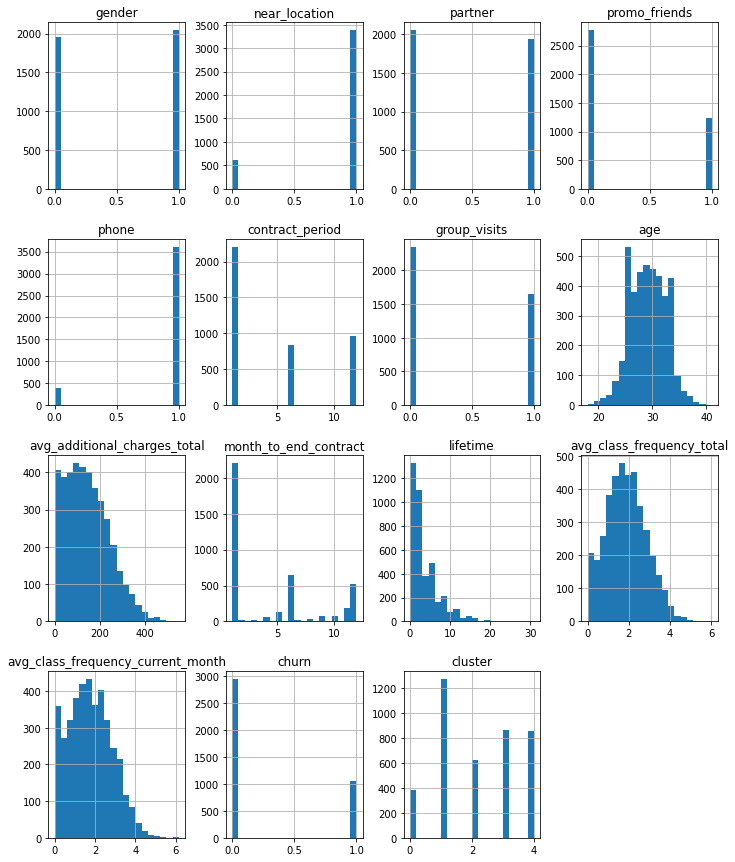

In [ ]:
gym.hist(bins=20,figsize=(12,15));

**Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?**

In [ ]:
gym.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.488189,0.725197,0.297638,0.010236,1.0,1.946457,0.279528,28.156693,129.758179,1.853543,2.245669,1.257469,1.007915,0.556693
2,0.492777,0.948636,0.812199,0.998395,1.0,3.017657,0.436597,29.038523,141.395773,2.826645,3.691814,1.701307,1.591963,0.263242
3,0.500000,0.937355,0.738979,0.483759,1.0,11.867749,0.549884,29.893271,163.338255,10.819026,4.692575,2.005023,1.997614,0.022042
4,0.559953,0.847497,0.284051,0.074505,1.0,2.676368,0.445867,30.046566,161.153113,2.474971,4.867288,2.811553,2.804386,0.079162


Las estadísticas de los valores medios y tasa de cancelación para los 5 clústeres:

Los clústeres 3 y 4 son un buen grupo objetivo, sus características clave son:

* Sus tasas de cancelación no superan el 8%.
* Sus frecuencias semanales promedio es de 2.4 veces por semana.
* Sus ciclos de vida dentro del gimnasio supera los 4 meses.
* Sus edades promedio se encuentran en los 29 años.
* Sus consumos extras dentro del gimnasio supera los 161 dólares.

Los clústeres 0, 1 y 2 son grupos con malos resultados, sus características clave son:

* Sus tasas de cancelación superan el 26%.
* Sus frecuencias semanales el mes anterior no supera el 1.9 por semana.
* Sus ciclos de vida dentro del gimnasio no supera los 4 meses.
* Sus edades promedio se encuentran en los 28 años.
* Sus consumos extras dentro del gimnasio no supera los 144 dólares.


## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre trabajar con clientes

---

# Conclusión final

Con respecto a la interacción con nuevos clientes:
* Enfocar los recursos de integración en base a los clústeres 3 y 4. 
* Desarrollar rutinas especificas para gente mayor de 30 años. 
* Generar beneficios por lealtad y compromiso para ganar mayor fidelidad

Con respecto a la retención de clientes:
* Contrarrestar la tasa de cancelación con algún beneficio tipo (pase vip para un amigo por x días)
* Motivar su concurrencia semanal con talleres basados en sus gustos.
* Generar descuentos por ciclo, 3 , 6 y 12 meses. 
* Generar info publicitaria que motive al consumo de productos pertenecientes al gimnasio.